# Finding the temporal autocorrelation order and evidence of slope
This notebook fits an ARIMA model for WESE data looking for evidence of change

In [1]:
# Load libraries
library(forecast); library(ggplot2);library(plyr); library(dplyr); library(fmsb); library(stats); library(lmtest)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [39]:
# Load the data
master<-read.csv("~/Workspace/Anthropocene/data/MASTER_SIE.csv")

In [40]:
head(master)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,Salinity,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,EMPE,WESE,WESE_1,av_SIE,SIC
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,34.845,0,38252,125441,34110,1108,0.6388527,NA,3.126,17.2
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,NA,0,47350,156441,36200,798,0.6505867,NA,3.269,31.0
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,34.790,0,41409,89489,23630,1201,0.6219035,1.05,2.983,37.2
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,34.835,1,26317,67114,13670,0,0.5084746,0.75,2.964,15.0
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,34.840,1,40678,161079,22390,247,0.5345502,0.80,2.779,44.9
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,34.836,1,22816,100843,19630,279,0.5084746,0.78,2.859,52.0


In [41]:
#calculating the annual percentage change for WESE
master_gr <- master %>% mutate(growth_wese=log(WESE/lag(WESE)))

In [42]:
head(master_gr)

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,EMPE,WESE,WESE_1,av_SIE,SIC,growth_wese
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,0,38252,125441,34110,1108,0.6388527,NA,3.126,17.2,NA
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,0,47350,156441,36200,798,0.6505867,NA,3.269,31.0,0.01820066
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,0,41409,89489,23630,1201,0.6219035,1.05,2.983,37.2,-0.04508964
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,1,26317,67114,13670,0,0.5084746,0.75,2.964,15.0,-0.20136967
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,1,40678,161079,22390,247,0.5345502,0.80,2.779,44.9,0.05001038
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1,22816,100843,19630,279,0.5084746,0.78,2.859,52.0,-0.05001038


In [6]:
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6

In [43]:
#lag 5 years SIE
master_gr <- master_gr %>% mutate(SIE_lag5 = lag(av_SIE,5))
master_gr[5,"SIE_lag5"]<-2.703
master_gr[4,"SIE_lag5"]<-3.123
master_gr[3,"SIE_lag5"]<-2.731
master_gr[2,"SIE_lag5"]<-2.767
master_gr[1,"SIE_lag5"]<-2.60

#lag 4 years SIE
master_gr <- master_gr %>% mutate(SIE_lag4 = lag(av_SIE,4))
master_gr[4,"SIE_lag4"]<-2.703
master_gr[3,"SIE_lag4"]<-3.123
master_gr[2,"SIE_lag4"]<-2.731
master_gr[1,"SIE_lag4"]<-2.767


#lag 4 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag4 = lag(GyreSPD,4))
master_gr[4,"GyreSPD_lag4"]<-6.2
master_gr[3,"GyreSPD_lag4"]<-6.3
master_gr[2,"GyreSPD_lag4"]<-5.7
master_gr[1,"GyreSPD_lag4"]<-5.8

#lag 5 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag5 = lag(GyreSPD,5))
master_gr[5,"GyreSPD_lag5"]<-6.2
master_gr[4,"GyreSPD_lag5"]<-6.3
master_gr[3,"GyreSPD_lag5"]<-5.7
master_gr[2,"GyreSPD_lag5"]<-5.8
master_gr[1,"GyreSPD_lag5"]<-5.0

#lag 5 years Air Temp
master_gr <- master_gr %>% mutate(mnAirTemp_lag5 = lag(mnAirTemp,5))
master_gr[5,"mnAirTemp_lag5"]<--5.6
master_gr[4,"mnAirTemp_lag5"]<--4.5
master_gr[3,"mnAirTemp_lag5"]<--5.2
master_gr[2,"mnAirTemp_lag5"]<--7.7
master_gr[1,"mnAirTemp_lag5"]<--4.2

# VARIABLES WITHOUT DATA FOR THE LAGGED YEARS (before 1998)

master_gr <- master_gr %>% mutate(mnWind_lag = lag(mnWind,5))
master_gr <- master_gr %>% mutate(Salinity_lag = lag(Salinity,5))
master_gr <- master_gr %>% mutate(mnSST_lag = lag(nmSST_aw_RSP,5))
master_gr <- master_gr %>% mutate(Prop134_lag = lag(Prop._134,5))
master_gr <- master_gr %>% mutate(SIC_lag4 = lag(SIC,4))
master_gr[4,"SIC_lag4"]<-16.8

In [44]:
# Quadratic variables
master_gr$SIC_lag4_2<- master_gr$SIC_lag4^2
master_gr$SIE_lag4_2<- master_gr$SIE_lag4^2
master_gr$SIE_2<- master_gr$mnSIE^2
master_gr$mnAirTemp_2<- master_gr$mnAirTemp^2
master_gr$SIE_lag5_2<- master_gr$SIE_lag5^2
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6
master_gr$mnOW_RSP6_2<-master_gr$mnOW_RSP6^2
master_gr$mnChl_aw_RSP_2<-master_gr$mnChl_aw_RSP^2
master_gr$nmSST_aw_RSP_2<-master_gr$nmSST_aw_RSP^2
master_gr$mnWind_2<-master_gr$mnWind^2
master_gr$GyreSPD_2<-master_gr$GyreSPD^2
master_gr$GyreSPD_lag4_2<-master_gr$GyreSPD_lag4^2
master_gr$GyreSPD_lag5_2<-master_gr$GyreSPD_lag5^2
master_gr$Salinity_2<-master_gr$Salinity^2
master_gr$intP_RSP_2<-master_gr$intP_RSP^2
master_gr$Prop._134_2<-master_gr$Prop._134^2
master_gr$TOTALTonnes.100_2<-master_gr$TOTALTonnes.100^2

In [45]:
head(master_gr)
master_gr[-1,]

,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1998,19.90901,1.161487,250157,-0.690398,-5.650,7.80,3.126,6.3,⋯,1.3490529,0.4766494,60.8400,39.69,33.64,25.00,1214.174,396.36862,NA,0.16810
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.8307708,0.8130016,60.2176,44.89,32.49,33.64,NA,517.56392,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.2066512,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.45700,900,44.81499
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,2.1323025,1.2482029,77.4400,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,0.0971943,1.0962299,73.9600,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1.6336163,0.2987705,70.5600,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225


,X,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,mnAirTemp,mnWind,mnSIE,GyreSPD,⋯,mnChl_aw_RSP_2,nmSST_aw_RSP_2,mnWind_2,GyreSPD_2,GyreSPD_lag4_2,GyreSPD_lag5_2,Salinity_2,intP_RSP_2,Prop._134_2,TOTALTonnes.100_2
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,1999,22.75003,1.353060,218399,-0.901666,-5.900,7.76,3.269,6.7,⋯,1.8307708,0.8130016,60.2176,44.89,32.49,33.64,NA,517.56392,NA,8.76160
3,3,2000,14.54156,1.098477,200943,-0.924639,-4.450,8.60,2.983,6.4,⋯,1.2066512,0.8549573,73.9600,40.96,39.69,32.49,1210.344,211.45700,900,44.81499
4,4,2001,23.53208,1.460241,250135,-1.117230,-6.175,8.80,2.964,6.6,⋯,2.1323025,1.2482029,77.4400,43.56,38.44,39.69,1213.477,553.75893,2500,32.31809
5,5,2002,2.45561,0.311760,190735,-1.047010,-6.050,8.60,2.779,4.4,⋯,0.0971943,1.0962299,73.9600,19.36,39.69,38.44,1213.826,6.03002,3025,151.50163
6,6,2003,15.70720,1.278130,268734,-0.546599,-4.625,8.40,2.859,7.0,⋯,1.6336163,0.2987705,70.5600,49.00,44.89,39.69,1213.547,246.71613,1225,201.09225
7,7,2004,20.91430,1.201000,236044,-0.551816,-5.000,8.80,2.759,7.2,⋯,1.4424010,0.3045009,77.4400,51.84,40.96,44.89,1213.477,437.40794,1444,426.24906
8,8,2005,21.73180,1.116710,218199,-0.970962,-5.250,8.80,2.832,7.8,⋯,1.2470412,0.9427672,77.4400,60.84,43.56,40.96,1210.692,472.27113,2025,1125.85078
9,9,2006,19.54790,1.344420,188097,-1.006890,-6.000,9.40,2.738,5.4,⋯,1.8074651,1.0138275,88.3600,29.16,19.36,43.56,1211.040,382.12039,1764,729.69677
10,10,2007,12.77470,1.170400,241795,-0.846050,-6.800,8.20,3.126,4.9,⋯,1.3698362,0.7158006,67.2400,24.01,49.00,19.36,NA,163.19296,1681,814.42315


Warning message:
“Removed 7 rows containing missing values (geom_point).”


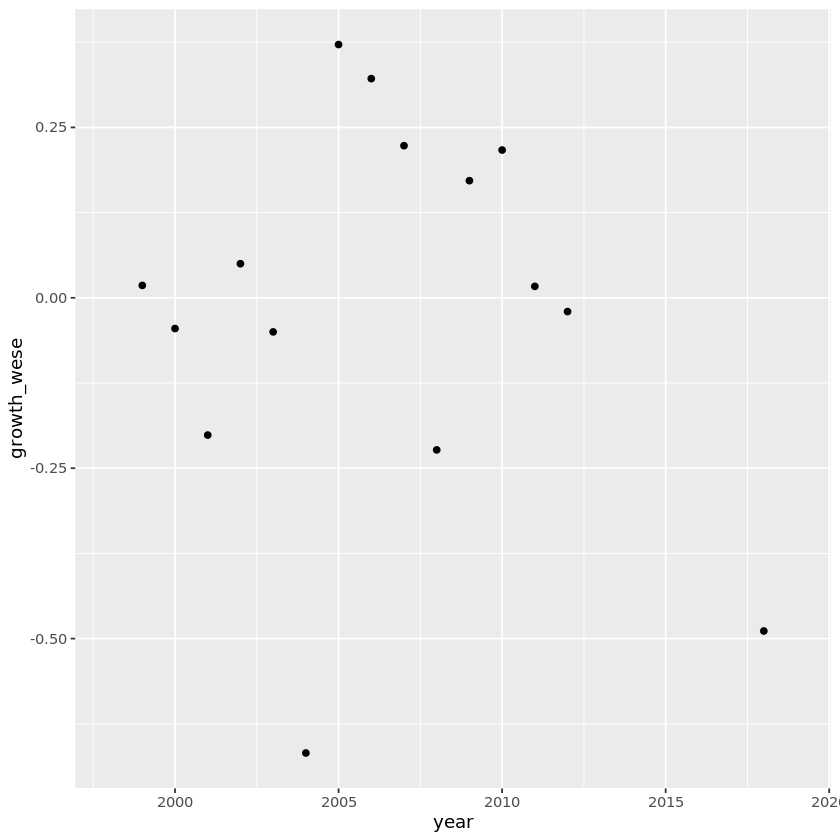

In [46]:
ggplot(master_gr, aes(x=year, y= growth_wese))+geom_point()

# Arima model with growth_wese

In [47]:
#checking best model
mdl1<-Arima(master_gr$growth_wese,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

Series: master_gr$growth_wese 
ARIMA(1,0,0) with drift 

Coefficients:
          ar1    drift
      -0.0421  -0.0028
s.e.   0.3196   0.0073

sigma^2 estimated as 0.08708:  log likelihood=-1.91
AIC=9.81   AICc=11.31   BIC=12.8

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.007221417 0.2747096 0.2096682 105.8938 121.9568 0.7788007
                   ACF1
Training set -0.0141746



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with drift
Q* = 3.0628, df = 3, p-value = 0.382

Model df: 2.   Total lags used: 5



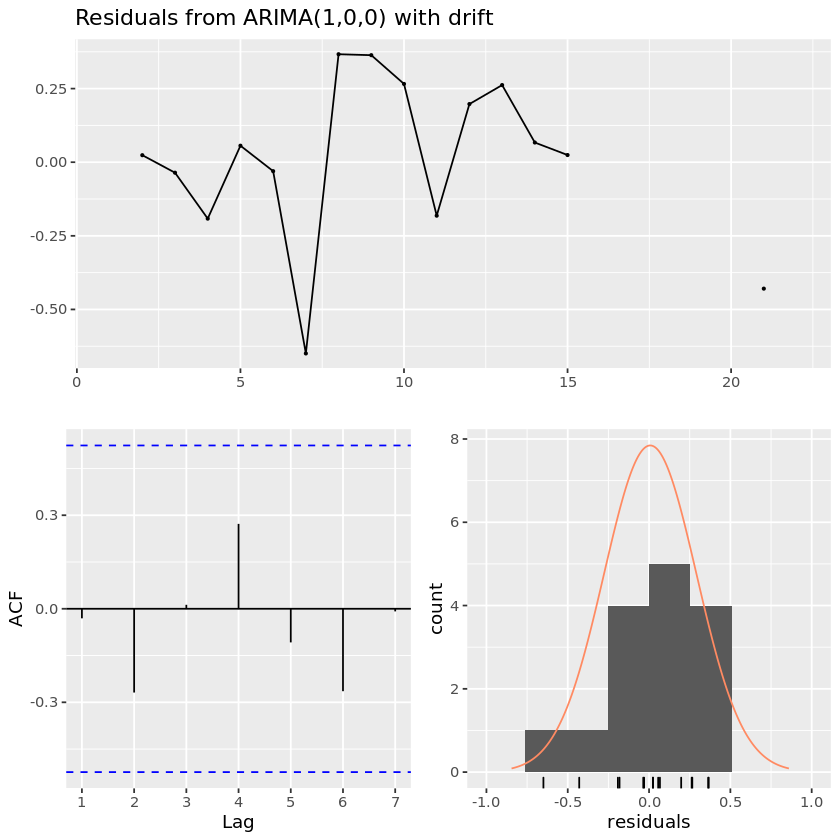

In [48]:
checkresiduals(mdl1)

## Plotting the correct trend

In [49]:
wese<-master_gr$growth_wese
names(wese)<-master_gr$year

Warning message:
“Removed 7 rows containing missing values (geom_point).”


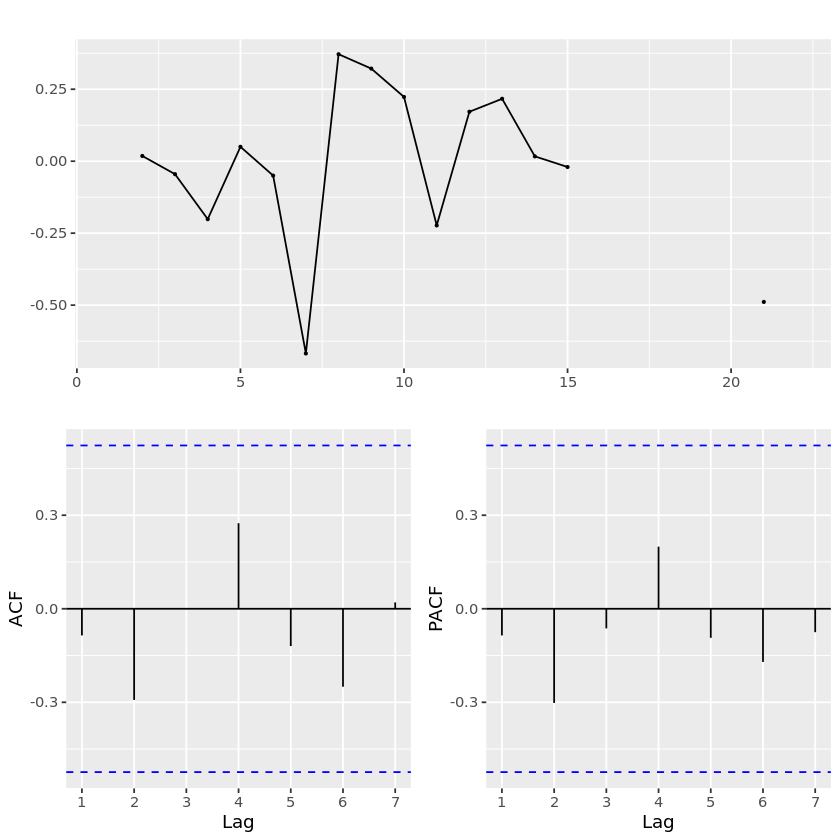

In [50]:
# Uncorrected trend
ggtsdisplay(wese)

In [51]:
#threshold at 10 (it’s equivalent to explaining 99% of the information in a variable by the set of the other covariates).

#select covariates based on variance inflation

in_frame <- master_gr %>% select (intP_RSP:mnChl_aw_RSP, nmSST_aw_RSP:GyreSPD, Salinity, mnOW_RSP6:SIE_lag5)

vif_func<-function(in_frame,thresh=10,trace=T,...){
  
  
  
  if(class(in_frame) != 'data.frame') in_frame<-data.frame(in_frame)
  
  
  
  #get initial vif value for all comparisons of variables
  
  vif_init<-NULL
  
  var_names <- names(in_frame)
  
  for(val in var_names){
    
    regressors <- var_names[-which(var_names == val)]
    
    form <- paste(regressors, collapse = '+')
    
    form_in <- formula(paste(val, '~', form))
    
    vif_init<-rbind(vif_init, c(val, VIF(lm(form_in, data = in_frame, ...))))
    
  }
  
  vif_max<-max(as.numeric(vif_init[,2]), na.rm = TRUE)
  
  
  
  if(vif_max < thresh){
    
    if(trace==T){ #print output of each iteration
      
      prmatrix(vif_init,collab=c('var','vif'),rowlab=rep('',nrow(vif_init)),quote=F)
      
      cat('\n')
      
      cat(paste('All variables have VIF < ', thresh,', max VIF ',round(vif_max,2), sep=''),'\n\n')
      
    }
    
    return(var_names)
    
  }
  
  else{
    
    
    
    in_dat<-in_frame
    
    
    
    #backwards selection of explanatory variables, stops when all VIF values are below 'thresh'
    
    while(vif_max >= thresh){
      
      
      
      vif_vals<-NULL
      
      var_names <- names(in_dat)
      
      
      
      for(val in var_names){
        
        regressors <- var_names[-which(var_names == val)]
        
        form <- paste(regressors, collapse = '+')
        
        form_in <- formula(paste(val, '~', form))
        
        vif_add<-VIF(lm(form_in, data = in_dat, ...))
        
        vif_vals<-rbind(vif_vals,c(val,vif_add))
        
      }
      
      max_row<-which(vif_vals[,2] == max(as.numeric(vif_vals[,2]), na.rm = TRUE))[1]
      
      
      
      vif_max<-as.numeric(vif_vals[max_row,2])
      
      
      
      if(vif_max<thresh) break
      
      
      
      if(trace==T){ #print output of each iteration
        
        prmatrix(vif_vals,collab=c('var','vif'),rowlab=rep('',nrow(vif_vals)),quote=F)
        
        cat('\n')
        
        cat('removed: ',vif_vals[max_row,1],vif_max,'\n\n')
        
        flush.console()
        
      }
      
      
      
      in_dat<-in_dat[,!names(in_dat) %in% vif_vals[max_row,1]]
      
      
      
    }
    
    
    
    return(names(in_dat))
    
    
    
  }
  
  
  
}
  
vif_func(in_frame,thresh=10,trace=T)

 var            vif
 intP_RSP       Inf
 mnChl_aw_RSP   Inf
 nmSST_aw_RSP   Inf
 mnAirTemp      Inf
 mnWind         Inf
 mnSIE          Inf
 GyreSPD        Inf
 Salinity       Inf
 mnOW_RSP6      Inf
 SIE_lag5_2     Inf
 mnAirTemp_2    Inf
 SIE_2          Inf
 SIE_lag4_2     Inf
 SIC_lag4_2     Inf
 SIC_lag4       Inf
 Prop134_lag    Inf
 mnSST_lag      Inf
 Salinity_lag   Inf
 mnWind_lag     Inf
 mnAirTemp_lag5 Inf
 GyreSPD_lag5   Inf
 GyreSPD_lag4   Inf
 SIE_lag4       Inf
 SIE_lag5       Inf

removed:  intP_RSP Inf 

 var            vif
 mnChl_aw_RSP   Inf
 nmSST_aw_RSP   Inf
 mnAirTemp      Inf
 mnWind         Inf
 mnSIE          Inf
 GyreSPD        Inf
 Salinity       Inf
 mnOW_RSP6      Inf
 SIE_lag5_2     Inf
 mnAirTemp_2    Inf
 SIE_2          Inf
 SIE_lag4_2     Inf
 SIC_lag4_2     Inf
 SIC_lag4       Inf
 Prop134_lag    Inf
 mnSST_lag      Inf
 Salinity_lag   Inf
 mnWind_lag     Inf
 mnAirTemp_lag5 Inf
 GyreSPD_lag5   Inf
 GyreSPD_lag4   Inf
 SIE_lag4       Inf
 SIE_lag5     

[1] "SIC_lag4_2"     "mnSST_lag"      "Salinity_lag"   "mnWind_lag"    
[5] "mnAirTemp_lag5" "GyreSPD_lag5"   "GyreSPD_lag4"   "SIE_lag4"      
[9] "SIE_lag5"

In [52]:
master_gr1 <-master_gr %>% filter(ICEBERG ==0)

# Including the saturated model

In [54]:
model_wese<- lm(growth_wese~ intP_RSP + mnChl_aw_RSP + GyreSPD + mnOW_RSP6 + nmSST_aw_RSP + mnAirTemp + mnWind + SIC +Prop._134, data=master_gr)

In [55]:
summary(model_wese)


Call:
lm(formula = growth_wese ~ intP_RSP + mnChl_aw_RSP + GyreSPD + 
    mnOW_RSP6 + nmSST_aw_RSP + mnAirTemp + mnWind + SIC + Prop._134, 
    data = master_gr)

Residuals:
       3        4        5        6        7        8        9       10 
-0.20762 -0.17590  0.08525 -0.16157 -0.04626  0.14412 -0.03371 -0.02162 
      11       12       13       14       15 
-0.03481  0.18232  0.14322  0.04910  0.07750 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -2.645776   3.068197  -0.862    0.452  
intP_RSP      0.007759   0.036507   0.213    0.845  
mnChl_aw_RSP -0.217809   0.564877  -0.386    0.726  
GyreSPD       0.028173   0.168214   0.167    0.878  
mnOW_RSP6     4.241539   6.228414   0.681    0.545  
nmSST_aw_RSP -1.200221   0.623079  -1.926    0.150  
mnAirTemp    -0.318573   0.266117  -1.197    0.317  
mnWind       -0.014494   0.263235  -0.055    0.960  
SIC           0.017814   0.007426   2.399    0.096 .
Prop._134    -0.038778   0.021045  -1.843 

In [56]:
step(model_wese)

Start:  AIC=-34.58
growth_wese ~ intP_RSP + mnChl_aw_RSP + GyreSPD + mnOW_RSP6 + 
    nmSST_aw_RSP + mnAirTemp + mnWind + SIC + Prop._134

               Df Sum of Sq     RSS     AIC
- mnWind        1   0.00020 0.19551 -36.562
- GyreSPD       1   0.00183 0.19714 -36.454
- intP_RSP      1   0.00294 0.19825 -36.381
- mnChl_aw_RSP  1   0.00968 0.20499 -35.947
- mnOW_RSP6     1   0.03019 0.22551 -34.707
<none>                      0.19531 -34.575
- mnAirTemp     1   0.09330 0.28861 -31.499
- Prop._134     1   0.22104 0.41635 -26.735
- nmSST_aw_RSP  1   0.24157 0.43688 -26.109
- SIC           1   0.37467 0.56998 -22.652

Step:  AIC=-36.56
growth_wese ~ intP_RSP + mnChl_aw_RSP + GyreSPD + mnOW_RSP6 + 
    nmSST_aw_RSP + mnAirTemp + SIC + Prop._134

               Df Sum of Sq     RSS     AIC
- GyreSPD       1   0.00164 0.19715 -38.453
- intP_RSP      1   0.00310 0.19861 -38.357
- mnChl_aw_RSP  1   0.01171 0.20722 -37.806
<none>                      0.19551 -36.562
- mnOW_RSP6     1   0.04263


Call:
lm(formula = growth_wese ~ mnOW_RSP6 + nmSST_aw_RSP + mnAirTemp + 
    SIC + Prop._134, data = master_gr)

Coefficients:
 (Intercept)     mnOW_RSP6  nmSST_aw_RSP     mnAirTemp           SIC  
    -2.30796       3.61688      -1.19714      -0.23974       0.01610  
   Prop._134  
    -0.03342  


In [57]:
#trying model above
model_wese<- lm(growth_wese~  GyreSPD + mnAirTemp + intP_RSP+ mnWind + SIC + mnChl_aw_RSP+ Prop._134 +nmSST_aw_RSP, data=master_gr)
summary (model_wese)


Call:
lm(formula = growth_wese ~ GyreSPD + mnAirTemp + intP_RSP + mnWind + 
    SIC + mnChl_aw_RSP + Prop._134 + nmSST_aw_RSP, data = master_gr)

Residuals:
       3        4        5        6        7        8        9       10 
-0.27741 -0.10566  0.09625 -0.10350 -0.13951  0.14659 -0.05016 -0.04117 
      11       12       13       14       15 
-0.02516  0.16438  0.12928  0.04540  0.16067 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -1.244577   2.117967  -0.588   0.5884  
GyreSPD       0.083424   0.137123   0.608   0.5758  
mnAirTemp    -0.341374   0.245670  -1.390   0.2370  
intP_RSP     -0.002870   0.030710  -0.093   0.9300  
mnWind       -0.101415   0.214234  -0.473   0.6606  
SIC           0.015235   0.005944   2.563   0.0624 .
mnChl_aw_RSP  0.011050   0.422505   0.026   0.9804  
Prop._134    -0.036582   0.019353  -1.890   0.1317  
nmSST_aw_RSP -0.926148   0.442633  -2.092   0.1046  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.

In [21]:
#trying model above, ONLY SST
model_wese<- lm(growth_wese~  nmSST_aw_RSP, data=master_gr) # GyreSPD + mnAirTemp + intP_RSP+ mnWind + mnSIE + mnChl_aw_RSP+ Prop._134 +
summary (model_wese)


Call:
lm(formula = growth_wese ~ nmSST_aw_RSP, data = master_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52867 -0.08336  0.06037  0.19187  0.30167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   -0.4144     0.3147  -1.317    0.213
nmSST_aw_RSP  -0.4988     0.3585  -1.391    0.189

Residual standard error: 0.2555 on 12 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.1389,	Adjusted R-squared:  0.06712 
F-statistic: 1.935 on 1 and 12 DF,  p-value: 0.1894


In [58]:
#trying model above, only SIC_lag4
model_wese<- lm(growth_wese~  SIC +SIC_lag4, data=master_gr) # GyreSPD + mnAirTemp + intP_RSP+ mnWind + mnSIE + mnChl_aw_RSP+ Prop._134 +
summary (model_wese)


Call:
lm(formula = growth_wese ~ SIC + SIC_lag4, data = master_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53724 -0.04660  0.04326  0.19305  0.26361 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.511991   0.218617  -2.342   0.0412 *
SIC          0.011372   0.005112   2.225   0.0503 .
SIC_lag4     0.005698   0.005416   1.052   0.3175  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2629 on 10 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.3953,	Adjusted R-squared:  0.2744 
F-statistic: 3.269 on 2 and 10 DF,  p-value: 0.08084


In [61]:
#trying model above, only SIC
model_wese<- lm(growth_wese~  SIC, data=master_gr) # GyreSPD + mnAirTemp + intP_RSP+ mnWind + mnSIE + mnChl_aw_RSP+ Prop._134 +
summary (model_wese)


Call:
lm(formula = growth_wese ~ SIC, data = master_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48511 -0.11508  0.01605  0.15691  0.36393 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.353806   0.150033  -2.358   0.0347 *
SIC          0.011482   0.004684   2.451   0.0291 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2454 on 13 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.3161,	Adjusted R-squared:  0.2635 
F-statistic: 6.009 on 1 and 13 DF,  p-value: 0.02914


In [63]:
#trying quadrtic effect of SIC_LAG4
model_wese<- lm(growth_wese~  SIC_lag4 + SIC_lag4_2, data=master_gr) # GyreSPD + mnAirTemp + intP_RSP+ mnWind + mnSIE + mnChl_aw_RSP+ Prop._134 +
summary (model_wese)


Call:
lm(formula = growth_wese ~ SIC_lag4 + SIC_lag4_2, data = master_gr)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4851 -0.1595  0.0906  0.2020  0.3501 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.8695666  0.6594709   1.319    0.217
SIC_lag4    -0.0756323  0.0480076  -1.575    0.146
SIC_lag4_2   0.0012727  0.0007358   1.730    0.114

Residual standard error: 0.282 on 10 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.3042,	Adjusted R-squared:  0.1651 
F-statistic: 2.186 on 2 and 10 DF,  p-value: 0.1631


In [64]:
#trying model above, only SIC and prop.134
model_wese<- lm(growth_wese~  SIC + Prop._134, data=master_gr) # GyreSPD + mnAirTemp + intP_RSP+ mnWind + mnSIE + mnChl_aw_RSP+ Prop._134 +
summary (model_wese)


Call:
lm(formula = growth_wese ~ SIC + Prop._134, data = master_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52827 -0.12408  0.06148  0.14803  0.31681 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.185462   0.324498  -0.572   0.5803  
SIC          0.010097   0.005491   1.839   0.0958 .
Prop._134   -0.002751   0.008501  -0.324   0.7529  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2601 on 10 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.2566,	Adjusted R-squared:  0.1079 
F-statistic: 1.726 on 2 and 10 DF,  p-value: 0.2271


In [65]:
#trying model above, ONLY Prop.134
model_wese<- lm(growth_wese~  Prop._134, data=master_gr) # GyreSPD + mnAirTemp + intP_RSP+ mnWind + mnSIE + mnChl_aw_RSP+ Prop._134 +
summary (model_wese)


Call:
lm(formula = growth_wese ~ Prop._134, data = master_gr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67963 -0.05543  0.00420  0.20495  0.34485 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.069124   0.351037  -0.197    0.847
Prop._134    0.002130   0.008907   0.239    0.815

Residual standard error: 0.2868 on 11 degrees of freedom
  (9 observations deleted due to missingness)
Multiple R-squared:  0.00517,	Adjusted R-squared:  -0.08527 
F-statistic: 0.05717 on 1 and 11 DF,  p-value: 0.8154
